In [1]:
import jax.numpy as jnp

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform


In [27]:


def build_min_max_ordering(array):
    
    order = []

    def split(array):
        if len(array) == 2:
            order.append(array[0])
            order.append(array[1])
        elif len(array) == 1:
            order.append(array[0])
        else:
            mid_point = len(array) // 2
            array_1 = array[:mid_point]
            array_2 = array[mid_point+1:]
            #print(array_1, array_2)
            order.append(array[mid_point])
            split(array_1)
            split(array_2)

    split(array)


    return order


In [32]:
X = jnp.arange(10)[:, None]

In [46]:
dist_matrix = squareform(pdist(X))

dist_matrix.shape

(10, 10)

In [51]:
max_min_order = []
X_duplicate = jnp.copy(X)
dist_matrix = squareform(pdist(X))
for i in range(10):
    # Select the point with the lowest average distance to all other points
    min_index = jnp.argmin(jnp.mean(dist_matrix, axis = 1))
    max_min_order.append(X_duplicate[min_index])

    # Remove the selected point from the distance matrix
    dist_matrix = jnp.delete(dist_matrix, min_index, axis = 0)
    dist_matrix = jnp.delete(dist_matrix, min_index, axis = 1)


    # Remove the selected point from the list of points
    X_duplicate = jnp.delete(X_duplicate, min_index, axis = 0)



[[0. 1. 2. 3. 5. 6. 7. 8. 9.]
 [1. 0. 1. 2. 4. 5. 6. 7. 8.]
 [2. 1. 0. 1. 3. 4. 5. 6. 7.]
 [3. 2. 1. 0. 2. 3. 4. 5. 6.]
 [5. 4. 3. 2. 0. 1. 2. 3. 4.]
 [6. 5. 4. 3. 1. 0. 1. 2. 3.]
 [7. 6. 5. 4. 2. 1. 0. 1. 2.]
 [8. 7. 6. 5. 3. 2. 1. 0. 1.]
 [9. 8. 7. 6. 4. 3. 2. 1. 0.]]
[[0. 1. 2. 3. 6. 7. 8. 9.]
 [1. 0. 1. 2. 5. 6. 7. 8.]
 [2. 1. 0. 1. 4. 5. 6. 7.]
 [3. 2. 1. 0. 3. 4. 5. 6.]
 [6. 5. 4. 3. 0. 1. 2. 3.]
 [7. 6. 5. 4. 1. 0. 1. 2.]
 [8. 7. 6. 5. 2. 1. 0. 1.]
 [9. 8. 7. 6. 3. 2. 1. 0.]]
[[0. 1. 2. 6. 7. 8. 9.]
 [1. 0. 1. 5. 6. 7. 8.]
 [2. 1. 0. 4. 5. 6. 7.]
 [6. 5. 4. 0. 1. 2. 3.]
 [7. 6. 5. 1. 0. 1. 2.]
 [8. 7. 6. 2. 1. 0. 1.]
 [9. 8. 7. 3. 2. 1. 0.]]
[[0. 1. 2. 7. 8. 9.]
 [1. 0. 1. 6. 7. 8.]
 [2. 1. 0. 5. 6. 7.]
 [7. 6. 5. 0. 1. 2.]
 [8. 7. 6. 1. 0. 1.]
 [9. 8. 7. 2. 1. 0.]]
[[0. 1. 7. 8. 9.]
 [1. 0. 6. 7. 8.]
 [7. 6. 0. 1. 2.]
 [8. 7. 1. 0. 1.]
 [9. 8. 2. 1. 0.]]
[[0. 1. 8. 9.]
 [1. 0. 7. 8.]
 [8. 7. 0. 1.]
 [9. 8. 1. 0.]]
[[0. 8. 9.]
 [8. 0. 1.]
 [9. 1. 0.]]
[[0. 9.]
 [9. 0.]]
[[0.]]
[

In [49]:
max_min_order = jnp.array(max_min_order)
max_min_order

Array([[4],
       [5],
       [3],
       [6],
       [2],
       [7],
       [1],
       [8],
       [0],
       [9]], dtype=int32)

In [35]:
build_min_max_ordering(jnp.arange(10))

[Array(5, dtype=int32),
 Array(2, dtype=int32),
 Array(0, dtype=int32),
 Array(1, dtype=int32),
 Array(3, dtype=int32),
 Array(4, dtype=int32),
 Array(8, dtype=int32),
 Array(6, dtype=int32),
 Array(7, dtype=int32),
 Array(9, dtype=int32)]

In [8]:
a = jnp.arange(10)
mid_point = 5
a_1 = a[:mid_point]
a_2= a[mid_point+1:]

a_1, a_2

(Array([0, 1, 2, 3, 4], dtype=int32), Array([6, 7, 8, 9], dtype=int32))

In [72]:


dist_matrix.shape

(10, 10)

In [74]:
X.shape

(100,)

In [75]:
X

Array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151516, 0.16161616, 0.17171717, 0.18181819, 0.1919192 ,
       0.2020202 , 0.21212122, 0.22222222, 0.23232323, 0.24242425,
       0.25252524, 0.26262626, 0.27272728, 0.28282827, 0.2929293 ,
       0.3030303 , 0.3131313 , 0.32323232, 0.33333334, 0.34343433,
       0.35353535, 0.36363637, 0.37373737, 0.3838384 , 0.3939394 ,
       0.4040404 , 0.41414142, 0.42424244, 0.43434343, 0.44444445,
       0.45454547, 0.46464646, 0.47474748, 0.4848485 , 0.4949495 ,
       0.5050505 , 0.5151515 , 0.5252525 , 0.53535354, 0.54545456,
       0.5555556 , 0.56565654, 0.57575756, 0.5858586 , 0.5959596 ,
       0.6060606 , 0.61616164, 0.6262626 , 0.6363636 , 0.64646465,
       0.65656567, 0.6666667 , 0.67676765, 0.68686867, 0.6969697 ,
       0.7070707 , 0.7171717 , 0.72727275, 0.7373737 , 0.74747

In [82]:
X = jnp.linspace(0,1, 100)[:, None]
dist_matrix = squareform(pdist(X))

# We always include boundary points at the beginning of the ordering
idx_order = [0, X.shape[0]-1]
# We start with all points not in the ordering
idx_left = jnp.arange(1, X.shape[0]-1)


dist_temp = dist_matrix[idx_order, :]
print(dist_temp.shape)
print(jnp.max(jnp.min(dist_temp, axis = 0), axis = -1).shape)
score_list = [ jnp.max(jnp.min(dist_temp, axis = 0), axis = -1)]

for i in range(X.shape[0]-2):
    best_score = jnp.inf
    best_idx = 0
    for j in range(len(idx_left)):
        current_idx = idx_left[j].item()
        temp_idx =idx_order.copy()
        temp_idx.append(current_idx)
        dist_temp = dist_matrix[temp_idx, :]
        
        current_score = jnp.max(jnp.min(dist_temp, axis = 0), axis = -1)
        if current_score < best_score:
            best_score = current_score
            best_j = j
    # Add the current score to the list
    score_list.append(best_score)
    # Add the selected point to the ordering
    idx_order.append(idx_left[best_j].item())
    # Remove the selected point from the distance matrix
    idx_left = jnp.delete(idx_left, best_j)



        












(2, 100)
(100,)
()


In [83]:
idx_order

[0,
 99,
 49,
 50,
 1,
 52,
 2,
 3,
 4,
 54,
 5,
 6,
 57,
 8,
 59,
 10,
 61,
 12,
 62,
 7,
 9,
 11,
 13,
 64,
 14,
 15,
 16,
 66,
 17,
 18,
 69,
 20,
 71,
 22,
 74,
 24,
 19,
 21,
 23,
 25,
 26,
 76,
 27,
 28,
 78,
 29,
 30,
 81,
 32,
 83,
 34,
 84,
 31,
 33,
 35,
 86,
 36,
 37,
 38,
 88,
 39,
 40,
 90,
 41,
 42,
 93,
 44,
 95,
 46,
 96,
 43,
 45,
 47,
 48,
 51,
 53,
 55,
 56,
 58,
 60,
 63,
 65,
 67,
 68,
 70,
 72,
 73,
 75,
 77,
 79,
 80,
 82,
 85,
 87,
 89,
 91,
 92,
 94,
 98,
 97]

In [80]:
import matplotlib.pyplot as plt

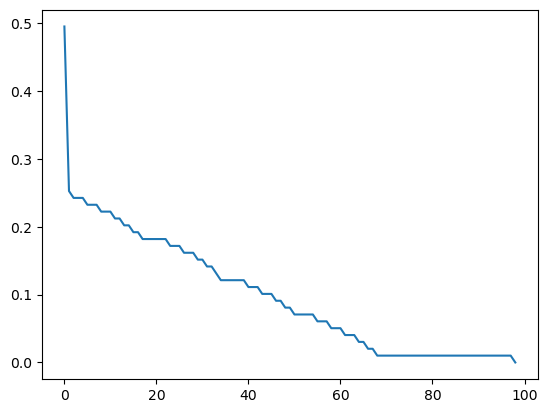

In [81]:
plt.plot(score_list)

In [19]:
idx_left

Array([0, 1, 2, 3, 5, 6, 7, 8, 9], dtype=int32)